<a href="https://colab.research.google.com/github/justinbkeeler/swam2024_pdw/blob/main/SWAM_2024_PDW_Python_%26_Excel_Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SWAM 2024 Professional Development Workshop | Python & Excel Integration

## Example 1: Employee Salary Analysis

### Applied Management Questions
    1) What is the average annual salary per department, and how does it vary with years spent at the company?
    2) Can we visualize the distribution of annual salaries across the company to see if there are any patterns or outliers?
    3) How does job satisfaction relate to annual salary, and are there differences in this relationship between departments?

In [ ]:
# Load pandas to import data
import pandas as pd

In [ ]:
df_eg1 = pd.read_csv("https://raw.githubusercontent.com/justinbkeeler/Datasets/main/swam2024_pdw_eg1.csv")
df_eg1

,Department,YearsWithCompany,JobSatisfaction,AnnualSalary,PromotionLast5Years,PerformanceRating,RemoteWork
0,Finance,18,5,70500.15,No,4,Part-time
1,Marketing,3,3,94213.91,Yes,3,NaN
2,HR,34,4,120835.67,No,3,Part-time
3,Marketing,16,2,114415.40,No,1,Part-time
4,Marketing,27,3,96235.07,No,4,NaN
...,...,...,...,...,...,...,...
95,HR,39,5,96005.63,No,4,NaN
96,HR,0,4,68997.11,No,4,NaN
97,Marketing,15,1,75209.45,No,2,Full-time
98,HR,38,5,91258.67,No,4,NaN


#### Question 1

In [ ]:
# Calculate the average annual salary across all departments
overall_average_salary = df_eg1['AnnualSalary'].mean()
overall_average_salary

117745.3942

In [ ]:
# Calculate the average annual salary by department
average_salary_by_department = df_eg1.groupby('Department')['AnnualSalary'].mean().sort_values()
average_salary_by_department

Department
HR           108566.412400
IT           114430.715000
Finance      118253.345455
Marketing    125687.218286
Name: AnnualSalary, dtype: float64

In [ ]:
# Groupby
average_salary_by_dept_years = df_eg1.groupby(['Department', 'YearsWithCompany'])['AnnualSalary'].mean().reset_index()
average_salary_by_dept_years

,Department,YearsWithCompany,AnnualSalary
0,Finance,0,93302.905
1,Finance,6,70236.480
2,Finance,7,150390.800
3,Finance,8,145205.090
4,Finance,12,148219.890
...,...,...,...
67,Marketing,33,87062.210
68,Marketing,34,192952.050
69,Marketing,35,184307.930
70,Marketing,36,92824.095


In [ ]:
# Pivot Table 1
average_salary_by_dept_years.pivot_table(values='AnnualSalary',index='YearsWithCompany',columns='Department',fill_value=0,margins = True, margins_name = "Total")

Department,Finance,HR,IT,Marketing,Total
YearsWithCompany,,,,,
0,93302.905000,58572.820000,0.000000,0.000000,75937.862500
1,0.000000,0.000000,194670.830000,135584.105000,165127.467500
2,0.000000,0.000000,0.000000,193237.635000,193237.635000
3,0.000000,0.000000,0.000000,145228.510000,145228.510000
4,0.000000,0.000000,0.000000,89184.285000,89184.285000
5,0.000000,39092.500000,0.000000,97448.480000,68270.490000
6,70236.480000,0.000000,0.000000,0.000000,70236.480000
7,150390.800000,119822.920000,0.000000,0.000000,135106.860000
8,145205.090000,0.000000,0.000000,0.000000,145205.090000


#### Question 2

<Figure size 1400x800 with 0 Axes>

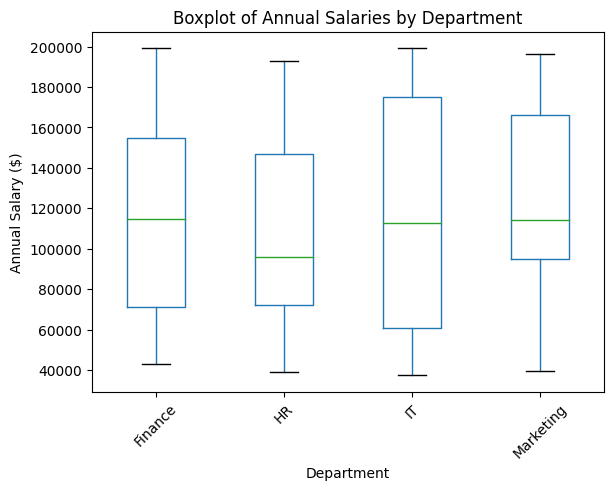

In [ ]:
# Set the figure size for better readability
plt.figure(figsize=(14, 8))

# Create boxplots for annual salaries by department
boxplots = df_eg1.boxplot(column='AnnualSalary', by='Department', grid=False)

# Set titles and labels
plt.title('Boxplot of Annual Salaries by Department')
plt.suptitle('')  # Suppress the automatic title to avoid duplication
plt.xlabel('Department')
plt.ylabel('Annual Salary ($)')
plt.xticks(rotation=45)  # Rotate the department names for better readability

# Show the plot
plt.show()

#### Question 3

<Figure size 1400x800 with 0 Axes>

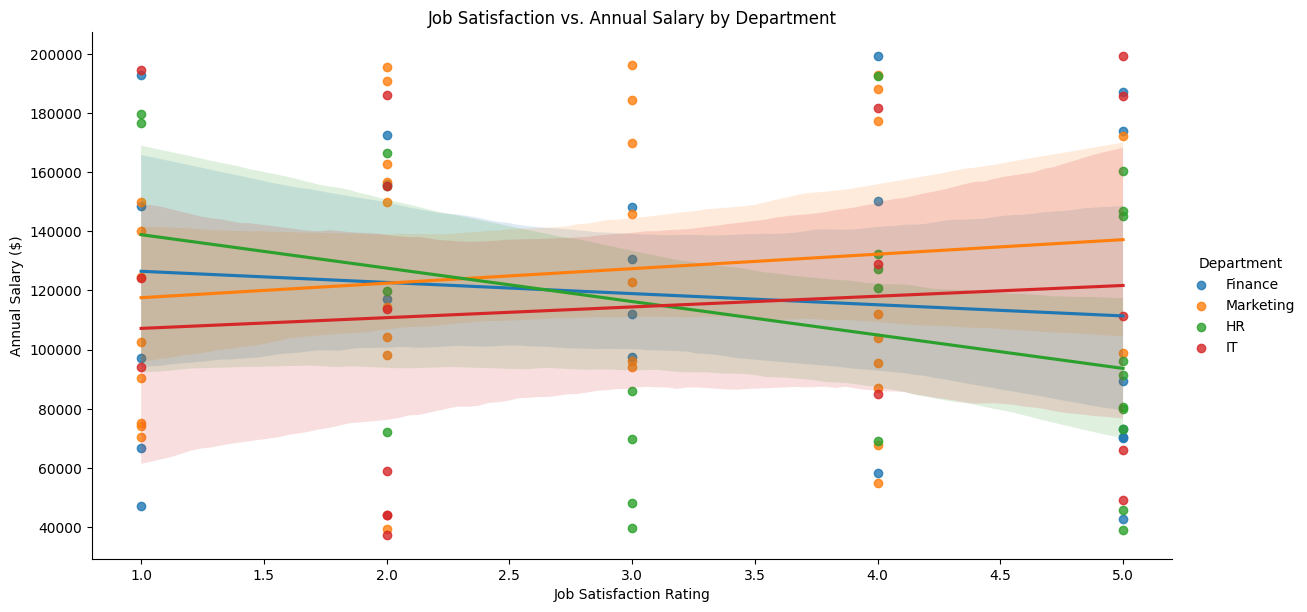

In [ ]:
# Using Seaborn to create a scatter plot with a regression line to see the relationship
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.lmplot(x='JobSatisfaction', y='AnnualSalary', hue='Department', data=df_eg1, aspect=2, height=6)
plt.title('Job Satisfaction vs. Annual Salary by Department')
plt.xlabel('Job Satisfaction Rating')
plt.ylabel('Annual Salary ($)')

# Show the plot
plt.show()

## Example 2: Analyzing Student Exam Performance

### Applied Management Question
    1) Does the exam average differ from one class section compared to another section?

In [ ]:
# Load pandas to import data (not really necessary again since we already loaded it)
import pandas as pd

In [ ]:
df_eg2a = pd.read_csv("https://raw.githubusercontent.com/justinbkeeler/Datasets/main/swam2024_pdw_eg2a.csv")
df_eg2b = pd.read_csv("https://raw.githubusercontent.com/justinbkeeler/Datasets/main/swam2024_pdw_eg2b.csv")

#### Question 1

##### Descriptives

In [ ]:
df_eg2a['score'].describe().map(lambda x: '{:.2f}'.format(x))

count    16.00
mean     67.97
std      17.71
min      37.50
25%      56.88
50%      71.25
75%      83.12
max      90.00
Name: score, dtype: object

In [ ]:
df_eg2b['score'].describe().map(lambda x: '{:.2f}'.format(x))

count    40.00
mean     69.44
std      16.16
min      42.50
25%      52.50
50%      73.75
75%      83.12
max      92.50
Name: score, dtype: object

Text(0, 0.5, 'Frequency')

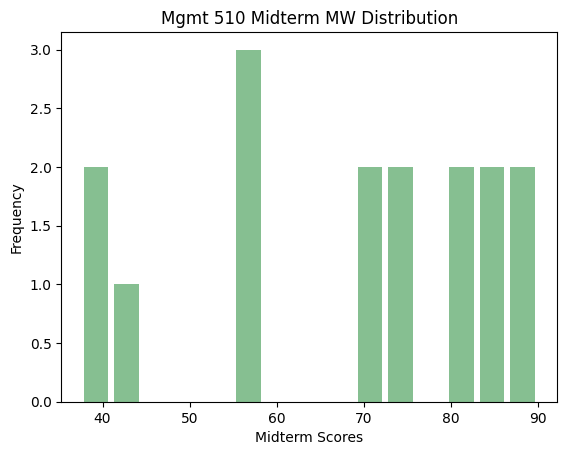

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df_eg2a['score'], bins=15, color='#86bf91', rwidth=0.8)
plt.title('Mgmt 510 Midterm MW Distribution')
plt.xlabel('Midterm Scores')
plt.ylabel('Frequency')

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

# Initialize a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(9, 7))

# Chart 1: Histogram of Variable_A
sns.histplot(df_eg2a['score'], ax=axes[0, 0], color='skyblue', kde=True, fill=True)
axes[0, 0].set_title('Histogram of Mgmt 510 - MW')
axes[0, 0].set_xlabel('Midterm Score')
axes[0, 0].set_ylabel('Frequency')

# Chart 2: Histogram of Variable_B
sns.histplot(df_eg2b['score'], ax=axes[0, 1], color='salmon', kde=True, fill=True)
axes[0, 1].set_title('Histogram of Mgmt 510 - W')
axes[0, 1].set_xlabel('Midterm Score')
axes[0, 1].set_ylabel('Frequency')

# Table 1: Descriptive Statistics for Variable_A
stats_A = df_eg2a['score'].describe().reset_index()
stats_A.columns = ['Statistic', 'Value']

# Formatting without rounding
stats_A['Value'] = stats_A['Value'].apply("{:.2f}".format)
axes[1, 0].axis('tight')
axes[1, 0].axis('off')
table_data = []
for row in stats_A.values:
    table_data.append(row)
table = axes[1, 0].table(cellText=table_data, colLabels=stats_A.columns, cellLoc = 'center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)

# Table 2: Descriptive Statistics for Variable_B
stats_B = df_eg2b['score'].describe().reset_index()
stats_B.columns = ['Statistic', 'Value']

stats_B['Value'] = stats_B['Value'].apply("{:.2f}".format)
axes[1, 1].axis('tight')
axes[1, 1].axis('off')
table_data = []
for row in stats_B.values:
    table_data.append(row)
table = axes[1, 1].table(cellText=table_data, colLabels=stats_B.columns, cellLoc = 'center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)

# Adjust spacing between subplots
plt.tight_layout(pad=4.0)

# Display the plots
plt.show()

Text(0, 0.5, 'Frequency')

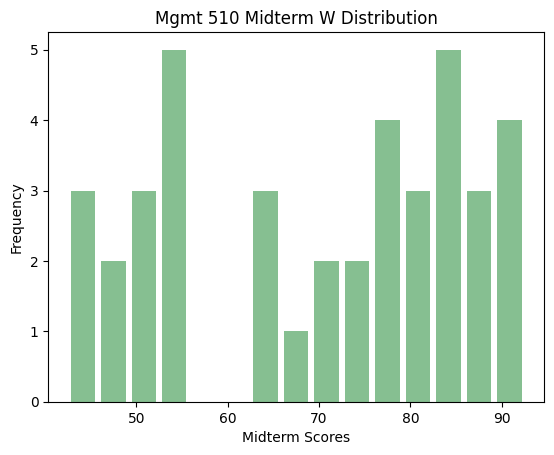

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df_eg2b['score'], bins=15, color='#86bf91', rwidth=0.8)
plt.title('Mgmt 510 Midterm W Distribution')
plt.xlabel('Midterm Scores')
plt.ylabel('Frequency')

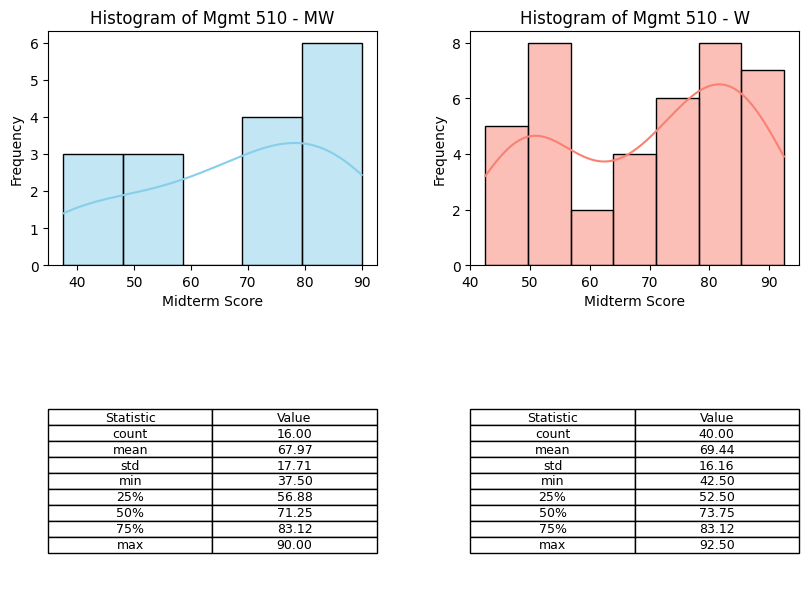

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

# Initialize a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(9, 7))

# Chart 1: Histogram of Variable_A
sns.histplot(df_eg2a['score'], ax=axes[0, 0], color='skyblue', kde=True, fill=True)
axes[0, 0].set_title('Histogram of Mgmt 510 - MW')
axes[0, 0].set_xlabel('Midterm Score')
axes[0, 0].set_ylabel('Frequency')

# Chart 2: Histogram of Variable_B
sns.histplot(df_eg2b['score'], ax=axes[0, 1], color='salmon', kde=True, fill=True)
axes[0, 1].set_title('Histogram of Mgmt 510 - W')
axes[0, 1].set_xlabel('Midterm Score')
axes[0, 1].set_ylabel('Frequency')

# Table 1: Descriptive Statistics for Variable_A
stats_A = df_eg2a['score'].describe().reset_index()
stats_A.columns = ['Statistic', 'Value']

# Formatting without rounding
stats_A['Value'] = stats_A['Value'].apply("{:.2f}".format)
axes[1, 0].axis('tight')
axes[1, 0].axis('off')
table_data = []
for row in stats_A.values:
    table_data.append(row)
table = axes[1, 0].table(cellText=table_data, colLabels=stats_A.columns, cellLoc = 'center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)

# Table 2: Descriptive Statistics for Variable_B
stats_B = df_eg2b['score'].describe().reset_index()
stats_B.columns = ['Statistic', 'Value']

stats_B['Value'] = stats_B['Value'].apply("{:.2f}".format)
axes[1, 1].axis('tight')
axes[1, 1].axis('off')
table_data = []
for row in stats_B.values:
    table_data.append(row)
table = axes[1, 1].table(cellText=table_data, colLabels=stats_B.columns, cellLoc = 'center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)

# Adjust spacing between subplots
plt.tight_layout(pad=4.0)

# Display the plots
plt.show()

##### Grouping Values & Calculating Means

In [ ]:
df_eg2a.groupby(pd.Grouper(key="team")).score.mean().sort_values(ascending=False).map(lambda x: '{:.2f}'.format(x))

team
1    74.38
4    68.75
3    65.62
2    63.12
Name: score, dtype: object

In [ ]:
df_eg2b.groupby(pd.Grouper(key="team")).score.mean().sort_values(ascending=False).map(lambda x: '{:.2f}'.format(x))

team
4    83.00
3    73.00
5    72.50
1    72.00
8    65.50
7    64.50
2    63.00
6    62.00
Name: score, dtype: object

##### ANOVA

In [ ]:
df_eg2a['group'] = 'MW'
df_eg2b['group'] = 'W'

df_eg2a = df_eg2a.rename(columns={'Midterm_MW': 'score'})
df_eg2b = df_eg2b.rename(columns={'Midterm_W': 'score'})

data_anova = pd.concat([df_eg2a, df_eg2b])

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the model
model = ols('score ~ C(group)', data=data_anova).fit()

# Perform ANOVA and print the table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq    df         F    PR(>F)
C(group)     24.654018   1.0  0.089447  0.766029
Residual  14883.828125  54.0       NaN       NaN


## Example 3: Network Analysis of Connectedness

### Applied Managment Questions  

    1) Who are the top/key influencers?  
    2) Who are the communication bottlenecks?  
    3) What are some of the subgroups and/or communities? Is anyone isolated?

In [ ]:
# Load library to build data frame via dictionary
import pandas as pd

In [ ]:
# Example data for 10 individuals
data = {
    'Source': [
        'Alice', 'Bob', 'Charlie', 'Alice', 'Eve', 'Frank', 'George', 'Harry', 'Ivy', 'Jane',
        'Robert', 'Bob', 'Charlie', 'Eve', 'Frank', 'George', 'Harry', 'Ivy', 'Jane', 'Alice',
        'Bob', 'Charlie', 'Eve', 'Frank', 'Ivy'
    ],
    'Target': [
        'Bob', 'Charlie', 'Alice', 'Eve', 'Frank', 'Eve', 'Harry', 'Ivy', 'Jane', 'Alice',
        'Charlie', 'Eve', 'Frank', 'Robert', 'Harry', 'Ivy', 'Jane', 'Alice', 'Robert', 'Jane',
        'Ivy', 'Harry', 'Robert', 'Alice', 'Eve'
    ],
    'Interaction_Type': [
        'Email', 'Meeting', 'Instant Message', 'Email', 'Instant Message', 'Meeting', 'Email',
        'Meeting', 'Email', 'Instant Message', 'Email', 'Meeting', 'Instant Message', 'Email',
        'Instant Message', 'Meeting', 'Email', 'Meeting', 'Email', 'Instant Message',
        'Email', 'Meeting', 'Instant Message', 'Email', 'Instant Message'
    ],
    'Timestamp': pd.date_range(start='2024-04-01', periods=25, freq='D'),
    'Duration': [
        0, 30, 0, 0, 0, 45, 0, 30, 0, 0, 0, 30, 0, 0, 0, 45, 0, 30, 0, 0,
        0, 30, 0, 0, 0
    ],  # Duration in minutes; 0 for instant interactions
    'Topic': [
        'Project Management', 'Feedback', 'Support', 'Project Management', 'Support', 'Feedback', 'Project Management',
        'Feedback', 'Support', 'Project Management', 'Support', 'Feedback', 'Project Management', 'Support',
        'Feedback', 'Project Management', 'Support', 'Feedback', 'Project Management', 'Support',
        'Feedback', 'Project Management', 'Support', 'Feedback', 'Project Management'
    ],
    'Sentiment': [
        'positive', 'neutral', 'positive', 'negative', 'positive', 'neutral', 'positive',
        'neutral', 'positive', 'negative', 'positive', 'neutral', 'positive', 'negative',
        'positive', 'neutral', 'positive', 'neutral', 'positive', 'negative',
        'positive', 'neutral', 'positive', 'negative', 'positive'
    ]
}

# Create DataFrame
df_eg3 = pd.DataFrame(data)

In [ ]:
df_eg3 = pd.read_csv("https://raw.githubusercontent.com/justinbkeeler/Datasets/main/swam2024_pdw_eg3.csv")

In [ ]:
df_eg3.to_csv("eg3.csv", index=False)

In [ ]:
print(df_eg3)

In [ ]:
# Load libraries for analyzing the network and visualizing relationships/patterns
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman

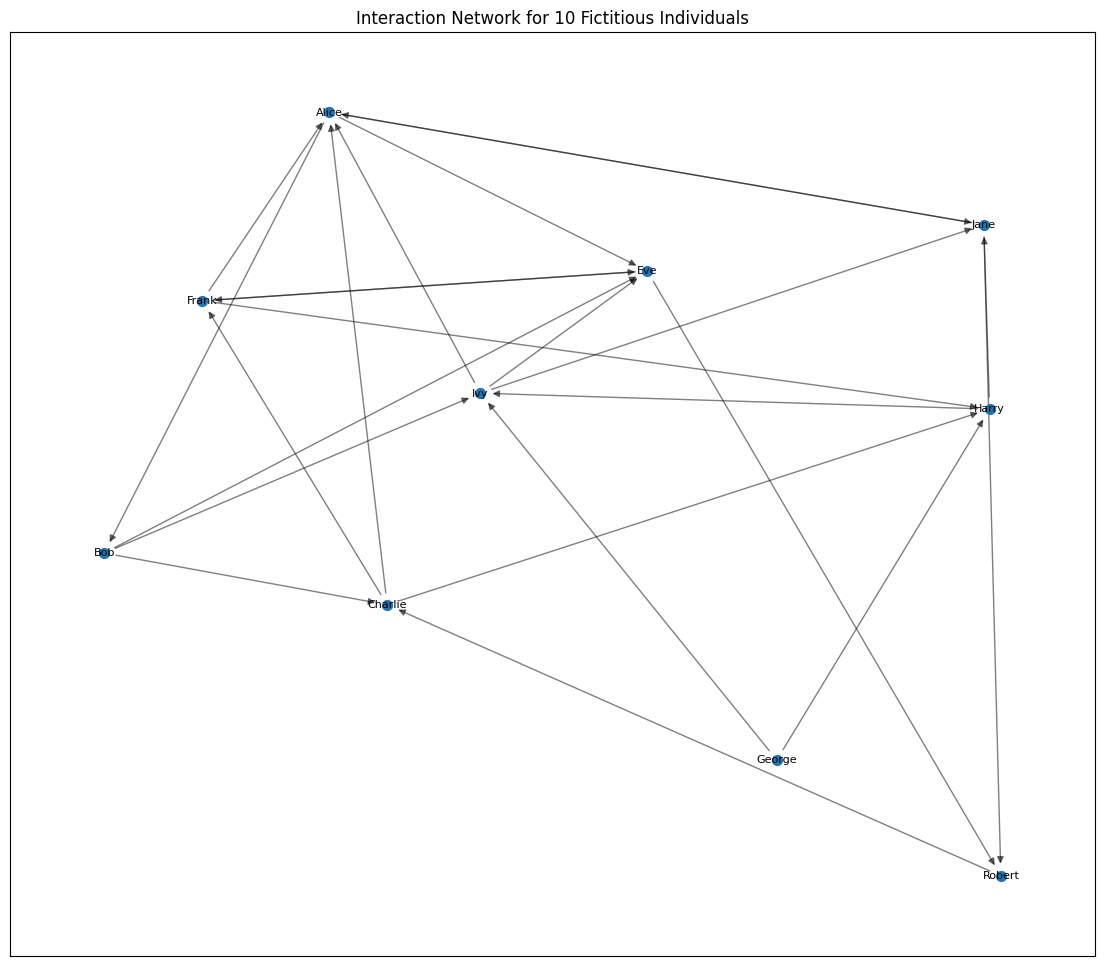

[{'Alice', 'Bob', 'Charlie', 'Eve', 'Frank', 'Harry', 'Ivy', 'Jane', 'Robert'},
 {'George'}]

In [ ]:
# Convert the DataFrame for 10 fictitious individuals to a directed graph
G_10 = nx.from_pandas_edgelist(df_eg3, 'Source', 'Target', ['Interaction_Type', 'Timestamp', 'Duration', 'Topic', 'Sentiment'], create_using=nx.DiGraph())

# Calculate degree centrality for the 10 individuals network
degree_centrality_10 = nx.degree_centrality(G_10)

# Calculate betweenness centrality for the 10 individuals network
betweenness_centrality_10 = nx.betweenness_centrality(G_10)

# Community detection using the Girvan-Newman algorithm for the 10 individuals network
communities_10 = next(girvan_newman(G_10))

# Visualization for the network of 10 individuals
plt.figure(figsize=(14, 12))
pos_10 = nx.spring_layout(G_10)  # positions for all nodes
nx.draw_networkx_nodes(G_10, pos_10, node_size=50)
nx.draw_networkx_edges(G_10, pos_10, alpha=0.5)
nx.draw_networkx_labels(G_10, pos_10, font_size=8)
plt.title('Interaction Network for 10 Fictitious Individuals')
plt.show()

# Display calculated metrics for demonstration
sorted_degree_centrality_10 = sorted(degree_centrality_10.items(), key=lambda x: x[1], reverse=True)[:5]  # Top 5
sorted_betweenness_centrality_10 = sorted(betweenness_centrality_10.items(), key=lambda x: x[1], reverse=True)[:5]  # Top 5
list(communities_10)[:3]  # Displaying a few communities for brevity


#### Question 1

In [ ]:
sorted_degree_centrality_10

[('Alice', 0.7777777777777777),
 ('Eve', 0.6666666666666666),
 ('Ivy', 0.6666666666666666),
 ('Charlie', 0.5555555555555556),
 ('Frank', 0.5555555555555556)]

In [ ]:
# Print top 5 key influencers based on degree centrality
print("Top 5 Key Influencers (Degree Centrality):")
for name, score in sorted_degree_centrality_10[:5]:
    print(f"{name:10}:{score:.4f}")

Top 5 Key Influencers (Degree Centrality):
Alice     :0.7778
Eve       :0.6667
Ivy       :0.6667
Charlie   :0.5556
Frank     :0.5556


Interpretation: These individuals are the most connected within the network, playing a significant role in the flow of communication among team members.

#### Question 2

In [ ]:
sorted_betweenness_centrality_10

[('Alice', 0.20949074074074073),
 ('Eve', 0.15856481481481483),
 ('Charlie', 0.15277777777777776),
 ('Ivy', 0.14467592592592593),
 ('Frank', 0.10763888888888888)]

In [ ]:
# Print top 5 communication bottlenecks based on betweenness centrality
print("\nTop 5 Communication Bottlenecks (Betweenness Centrality):")
for name, score in sorted_betweenness_centrality_10[:5]:
    print(f"{name:10}: {score:.4f}")


Top 5 Communication Bottlenecks (Betweenness Centrality):
Alice     : 0.2095
Eve       : 0.1586
Charlie   : 0.1528
Ivy       : 0.1447
Frank     : 0.1076


Interpretation: These scores highlight individuals who frequently act as bridges in the communication flow, underscoring their importance in connecting different parts of the network.

#### Question 3

In [ ]:
list(communities_10)[:5]

[{'Alice', 'Bob', 'Charlie', 'Eve', 'Frank', 'Harry', 'Ivy', 'Jane', 'Robert'},
 {'George'}]

In [ ]:
# Detecting communities
communities = next(girvan_newman(G_10))
print("\nIdentified Communities:")
for i, community in enumerate(communities, start=1):
    print(f"Community {i}: {', '.join(community)}")


Identified Communities:
Community 1: Harry, Bob, Robert, Jane, Charlie, Ivy, Frank, Eve, Alice
Community 2: George


Interpretation

*   The first and larger group consists of Alice, Bob, Charlie, Eve, Frank, Harry, Ivy, Jane, and Robert. This suggests a densely connected network where most interactions occur, indicative of a main collaborative or functional group.
*   The second, much smaller group, consists of a single individual, George. This isolation might indicate a specialized role or a lesser degree of integration into the main flow of communication within the network.



    

### What is the difference between influence & communication bottleneck?

**Influence**

Influence typically relates to an individual’s or node's ability to affect others within the network. This can be through spreading information, ideas, or behaviors. Influence is often measured by metrics such as degree centrality, which reflects how connected an individual is within the network. Highly influential nodes have many direct connections, meaning they can directly interact with many others. Influence can also be observed through metrics like eigenvector centrality, which considers not just the number of connections but the quality of those connections (being connected to other highly connected nodes).

**Communication Bottlenecks**

Communication bottlenecks, on the other hand, refer to nodes through which a significant portion of the network’s information must pass to reach other parts of the network. This concept is closely related to betweenness centrality, a metric that identifies nodes that frequently act as bridges or mediators between different parts of the network. High betweenness centrality indicates that a node is crucial for information flow across the network, potentially controlling or influencing the spread of information between otherwise disconnected or distant groups.
Key Differences

**Role in Information Flow**

While influential nodes are key to spreading information widely due to their many connections, bottlenecks are critical for their strategic position in the network, controlling the flow of information between different clusters or subnetworks.

**Network Impact**

Influence is about the capacity to reach and affect others directly or indirectly through one's connections. Bottlenecks highlight a node’s importance in connectivity and network cohesion, emphasizing the role in connecting disparate groups.

**Centrality Measures**

Different centrality measures are used to identify influential nodes (like degree centrality) and bottlenecks (like betweenness centrality), reflecting their different roles in the network.

**Are They the Same?**

While there can be overlap—highly influential nodes might also serve as communication bottlenecks due to their extensive connections—their primary functions and the ways they are identified within a network differ. A node can be a bottleneck without being the most influential if it uniquely connects separate communities, and a node can be influential by having many connections within a tightly-knit community without being a bottleneck.

### Is sentiment analysis used in these analyses? We captured it in the sample data.

No, sentiment analysis is not included in what we have derived. It could be though with additional integration.

Sentiment (positive, negative, neutral) of interactions can significantly impact team dynamics but is not directly analyzed with basic network metrics like centrality or community detection algorithms. We would typically need to examine the correlation between sentiment and the structure or strength of connections in the network.
    
Positive interactions might strengthen ties between individuals, encouraging more frequent and substantive communication. Negative interactions could weaken ties or lead to the formation of subgroups within the network, potentially impacting overall team cohesion.
    
High volumes of positive sentiment could lead to a more tightly knit network with robust collaboration, while prevalent negative sentiment might result in a fragmented network with isolated nodes or subgroups. Neutral interactions may have a stabilizing effect, maintaining existing network structures without significantly altering relational dynamics.